In [1]:
import pandas as pd 
import os

# Merge all files in one 

In [2]:
files = [file for file in os.listdir('../Datasets/Week5/')]

dft = pd.DataFrame()

for file in files:
    df = pd.read_csv('../Datasets/Week5/'+file)
    dft = pd.concat([dft,df])

    
# Save all data in one file, na_rep='<value to replace>' index=<bool>

dft.to_csv('merged_data.csv', index=False, na_rep='(missing)')

In [3]:
df = pd.read_csv('merged_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,(missing),(missing),(missing),(missing),(missing),(missing)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean up the data

In [4]:
df.loc[df['Product'] == '(missing)']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,(missing),(missing),(missing),(missing),(missing),(missing)
356,(missing),(missing),(missing),(missing),(missing),(missing)
735,(missing),(missing),(missing),(missing),(missing),(missing)
1433,(missing),(missing),(missing),(missing),(missing),(missing)
1553,(missing),(missing),(missing),(missing),(missing),(missing)
...,...,...,...,...,...,...
185176,(missing),(missing),(missing),(missing),(missing),(missing)
185438,(missing),(missing),(missing),(missing),(missing),(missing)
186042,(missing),(missing),(missing),(missing),(missing),(missing)
186548,(missing),(missing),(missing),(missing),(missing),(missing)


In [5]:
df = df[df['Product'] != '(missing)'] # Remove (missing) data

In [6]:
df = df[df['Product'] != 'Product'] # Remove trash data

# Save and Load again

In [7]:
df.to_csv('merged_data.csv', index=False, na_rep='(missing)')

In [8]:
df = pd.read_csv('merged_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Reorder the data

In [9]:
df['Month'] = df['Order Date'].str[:2]
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [10]:
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [11]:
df['Day'] = df['Order Date'].str[3:5]
df['Day'] = df['Day'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30


In [12]:
df['Year'] = df['Order Date'].str[6:9]
df['Year'] = df['Year'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,19
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19


In [13]:
df['Hour'] = df['Order Date'].str[9:14]
df['Hour'] = df['Hour'].astype('str')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,08:46
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,19,22:30
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,14:38
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,14:38
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19,09:27


In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [15]:
df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Day                          int32
Year                         int32
Hour                        object
dtype: object

In [16]:
df[['Street','City','Code']] = df['Purchase Address'].str.split(',', expand=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Hour,Street,City,Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,19,08:46,917 1st St,Dallas,TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,19,22:30,682 Chestnut St,Boston,MA 02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,14:38,669 Spruce St,Los Angeles,CA 90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,14:38,669 Spruce St,Los Angeles,CA 90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,19,09:27,333 8th St,Los Angeles,CA 90001


In [17]:
df['Sales'] = df['Price Each'] * df['Quantity Ordered']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Hour,Street,City,Code,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,19,08:46,917 1st St,Dallas,TX 75001,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,19,22:30,682 Chestnut St,Boston,MA 02215,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,14:38,669 Spruce St,Los Angeles,CA 90001,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,14:38,669 Spruce St,Los Angeles,CA 90001,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,19,09:27,333 8th St,Los Angeles,CA 90001,11.99


# Save again with all data

In [18]:
df.to_csv('merged_data.csv', index=False)

# Validate all our data 

In [19]:
df = pd.read_csv('merged_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Hour,Street,City,Code,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,19,08:46,917 1st St,Dallas,TX 75001,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,19,22:30,682 Chestnut St,Boston,MA 02215,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,14:38,669 Spruce St,Los Angeles,CA 90001,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,14:38,669 Spruce St,Los Angeles,CA 90001,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,19,09:27,333 8th St,Los Angeles,CA 90001,11.99


In [20]:
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Day                   int64
Year                  int64
Hour                 object
Street               object
City                 object
Code                 object
Sales               float64
dtype: object

In [30]:
result = df.groupby('City').sum()
result

,Order ID,Quantity Ordered,Price Each,Month,Day,Year,Sales
City,,,,,,,
Atlanta,3423838407,16602,2.779908e+06,104794,234837,339887,2.795499e+06
Austin,2280982185,11153,1.809874e+06,69829,156782,226417,1.819582e+06
Boston,4598265261,22528,3.637410e+06,141112,312376,457374,3.661642e+06
Dallas,3415643578,16730,2.752628e+06,104620,234435,332542,2.767975e+06
Los Angeles,6811084693,33289,5.421435e+06,208325,469607,666418,5.452571e+06
New York City,5736333884,27932,4.635371e+06,175741,392706,559468,4.664317e+06
Portland,2868861092,14053,2.307747e+06,87765,197521,279607,2.320491e+06
San Francisco,10304443952,50239,8.211462e+06,315520,702669,1011172,8.262204e+06
Seattle,3406693974,16553,2.733296e+06,104941,229552,333781,2.747755e+06


In [31]:
cities = [city for city, df in df.groupby('City')]
cities

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

In [32]:
products = [product for product, df in df.groupby('Product')]
products

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

In [35]:
quantity_ordered = df.groupby('Product').sum()['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [36]:
city_quantity_ordered = df.groupby(['Product', 'City']).sum()['Quantity Ordered']
city_quantity_ordered

Product       City          
20in Monitor   Atlanta           342
               Austin            230
               Boston            394
               Dallas            343
               Los Angeles       658
                                ... 
iPhone         Los Angeles      1118
               New York City     881
               Portland          450
               San Francisco    1661
               Seattle           546
Name: Quantity Ordered, Length: 171, dtype: int64

In [38]:
city_quantity_ordered.index

MultiIndex([(          '20in Monitor',       ' Atlanta'),
            (          '20in Monitor',        ' Austin'),
            (          '20in Monitor',        ' Boston'),
            (          '20in Monitor',        ' Dallas'),
            (          '20in Monitor',   ' Los Angeles'),
            (          '20in Monitor', ' New York City'),
            (          '20in Monitor',      ' Portland'),
            (          '20in Monitor', ' San Francisco'),
            (          '20in Monitor',       ' Seattle'),
            ('27in 4K Gaming Monitor',       ' Atlanta'),
            ...
            (      'Wired Headphones',       ' Seattle'),
            (                'iPhone',       ' Atlanta'),
            (                'iPhone',        ' Austin'),
            (                'iPhone',        ' Boston'),
            (                'iPhone',        ' Dallas'),
            (                'iPhone',   ' Los Angeles'),
            (                'iPhone', ' New York City')

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
for i in city_quantity_ordered.index:
    print(i)

('20in Monitor', ' Atlanta')
('20in Monitor', ' Austin')
('20in Monitor', ' Boston')
('20in Monitor', ' Dallas')
('20in Monitor', ' Los Angeles')
('20in Monitor', ' New York City')
('20in Monitor', ' Portland')
('20in Monitor', ' San Francisco')
('20in Monitor', ' Seattle')
('27in 4K Gaming Monitor', ' Atlanta')
('27in 4K Gaming Monitor', ' Austin')
('27in 4K Gaming Monitor', ' Boston')
('27in 4K Gaming Monitor', ' Dallas')
('27in 4K Gaming Monitor', ' Los Angeles')
('27in 4K Gaming Monitor', ' New York City')
('27in 4K Gaming Monitor', ' Portland')
('27in 4K Gaming Monitor', ' San Francisco')
('27in 4K Gaming Monitor', ' Seattle')
('27in FHD Monitor', ' Atlanta')
('27in FHD Monitor', ' Austin')
('27in FHD Monitor', ' Boston')
('27in FHD Monitor', ' Dallas')
('27in FHD Monitor', ' Los Angeles')
('27in FHD Monitor', ' New York City')
('27in FHD Monitor', ' Portland')
('27in FHD Monitor', ' San Francisco')
('27in FHD Monitor', ' Seattle')
('34in Ultrawide Monitor', ' Atlanta')
('34in Ult

In [61]:
b = [list(c) for c in city_quantity_ordered.index[:][:]]
b

[['20in Monitor', ' Atlanta'],
 ['20in Monitor', ' Austin'],
 ['20in Monitor', ' Boston'],
 ['20in Monitor', ' Dallas'],
 ['20in Monitor', ' Los Angeles'],
 ['20in Monitor', ' New York City'],
 ['20in Monitor', ' Portland'],
 ['20in Monitor', ' San Francisco'],
 ['20in Monitor', ' Seattle'],
 ['27in 4K Gaming Monitor', ' Atlanta'],
 ['27in 4K Gaming Monitor', ' Austin'],
 ['27in 4K Gaming Monitor', ' Boston'],
 ['27in 4K Gaming Monitor', ' Dallas'],
 ['27in 4K Gaming Monitor', ' Los Angeles'],
 ['27in 4K Gaming Monitor', ' New York City'],
 ['27in 4K Gaming Monitor', ' Portland'],
 ['27in 4K Gaming Monitor', ' San Francisco'],
 ['27in 4K Gaming Monitor', ' Seattle'],
 ['27in FHD Monitor', ' Atlanta'],
 ['27in FHD Monitor', ' Austin'],
 ['27in FHD Monitor', ' Boston'],
 ['27in FHD Monitor', ' Dallas'],
 ['27in FHD Monitor', ' Los Angeles'],
 ['27in FHD Monitor', ' New York City'],
 ['27in FHD Monitor', ' Portland'],
 ['27in FHD Monitor', ' San Francisco'],
 ['27in FHD Monitor', ' Seattl

In [75]:
city_quantity_ordered

Product       City          
20in Monitor   Atlanta           342
               Austin            230
               Boston            394
               Dallas            343
               Los Angeles       658
                                ... 
iPhone         Los Angeles      1118
               New York City     881
               Portland          450
               San Francisco    1661
               Seattle           546
Name: Quantity Ordered, Length: 171, dtype: int64

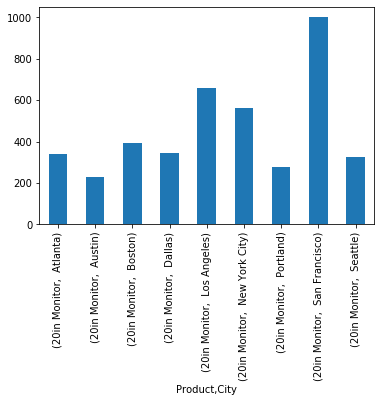

In [108]:
fig = city_quantity_ordered[:9].plot(kind='bar')

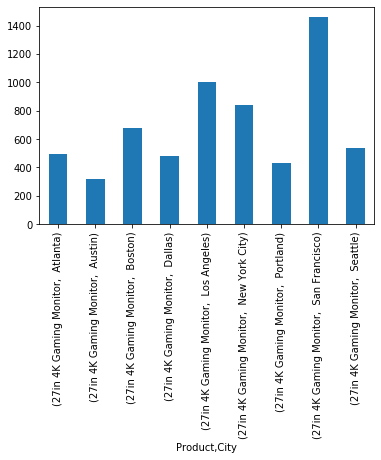

In [109]:
fig2 = city_quantity_ordered[9:18].plot(kind='bar')

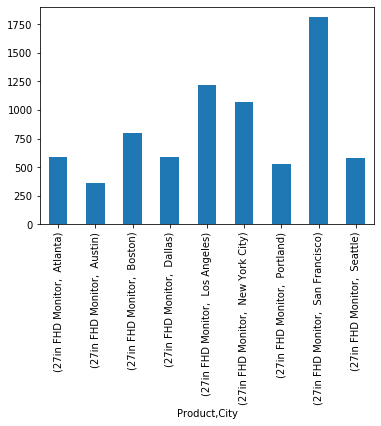

In [110]:
fig2 = city_quantity_ordered[18:27].plot(kind='bar')